# Step 1: Big Picture & Setup


In [0]:
import sklearn

# Common imports
import numpy as np 
import os 
import io
np.random.seed(317)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  """Save the selected figure into disc under an image extention and resolution

  Parameters
  ----------
  fig_id : figure handle
    The id number of the figure
  tight_layout : boolean (True or False)
    Specifies whenther the layout should be tight or not
  fig_extension: string
    Under what extension should the file be saved ("png" or "jpg")
  resolution: int
    the quality of the figure (ie. 100,200,300)

  Returns
  -------
  void
    Does not return any value
  """

  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("Saving figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

Step 2: Get the Data

In [5]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

In [0]:
housing=pd.read_csv('housing.csv',header=None,delim_whitespace=True)
housing.columns=['Crime rate','Land zone','Business Acre','Charles River','Nitric oxides','Rooms','Age','Distance','radial highways','Tax','PTRatio','Blacks','%Lower status','MEDV']

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
Crime rate         506 non-null float64
Land zone          506 non-null float64
Business Acre      506 non-null float64
Charles River      506 non-null int64
Nitric oxides      506 non-null float64
Rooms              506 non-null float64
Age                506 non-null float64
Distance           506 non-null float64
radial highways    506 non-null int64
Tax                506 non-null float64
PTRatio            506 non-null float64
Blacks             506 non-null float64
%Lower status      506 non-null float64
MEDV               506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
housing.describe()

,Crime rate,Land zone,Business Acre,Charles River,Nitric oxides,Rooms,Age,Distance,radial highways,Tax,PTRatio,Blacks,%Lower status,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Saving figure attribute_histogram_plots


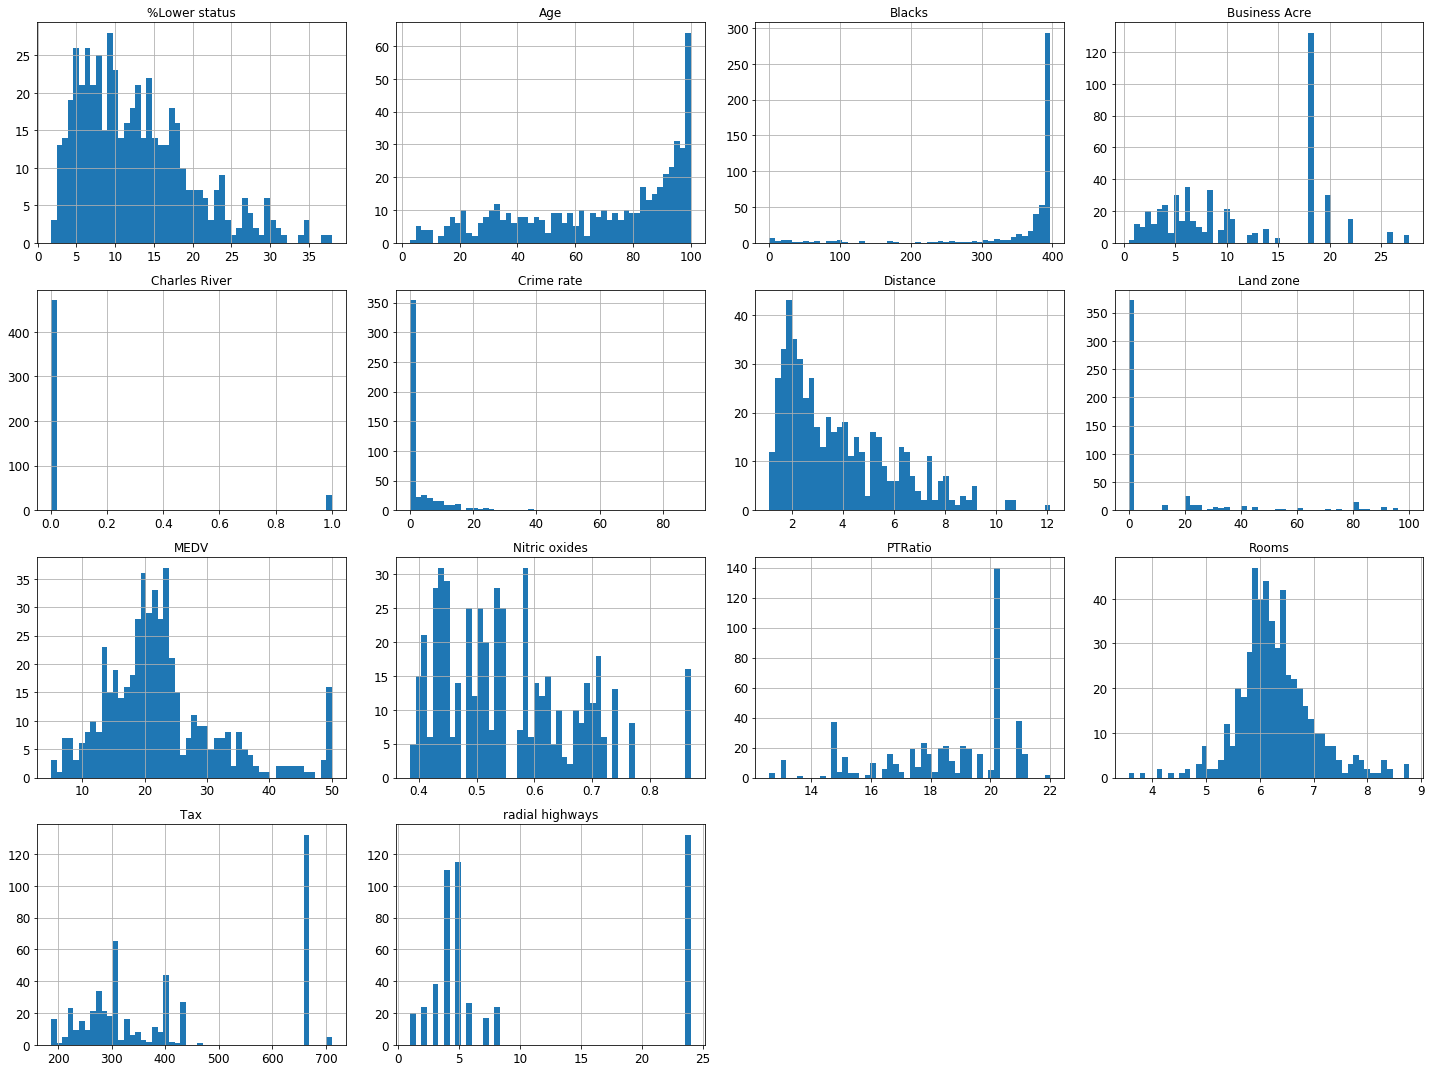

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [0]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    """An simple implementation of the spliting into train and test sets"""
    shuffled_indices = np.random.permutation(len(data)) # Give it random indexes
    test_set_size = int(len(data) * test_ratio) # split into ratio
    test_indices = shuffled_indices[:test_set_size] # extract index of test examples
    train_indices = shuffled_indices[test_set_size:] # extract index of train examples
    return data.iloc[train_indices], data.iloc[test_indices] # return the splited data

In [11]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)
print(train_set.shape)

(405, 14)


In [12]:
print(test_set.shape)

(101, 14)


# Step 3. Discover and visualize the data to gain insights

In [0]:
housing = train_set.copy()

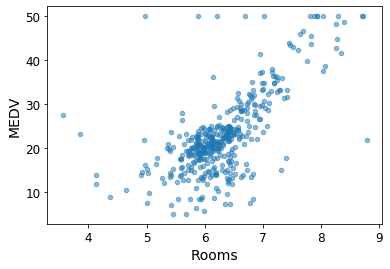

In [14]:
housing.plot(kind="scatter", x="Rooms", y="MEDV",alpha=0.5)

In [15]:
corr_matrix = housing.corr()
corr_matrix.shape

(14, 14)

In [16]:
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV               1.000000
Rooms              0.673783
Land zone          0.366701
Blacks             0.318666
Distance           0.221668
Charles River      0.158696
radial highways   -0.334002
Age               -0.366248
Crime rate        -0.374031
Nitric oxides     -0.402161
Tax               -0.423933
Business Acre     -0.465466
PTRatio           -0.499709
%Lower status     -0.736934
Name: MEDV, dtype: float64

The highest correlation between 'MEDV' (Median value of owner-occupied homes in $1000s) and the independent variables are 'Rooms', '%Lower status', and 'PTRatio'. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f20c636b5f8>,
      dtype=object)

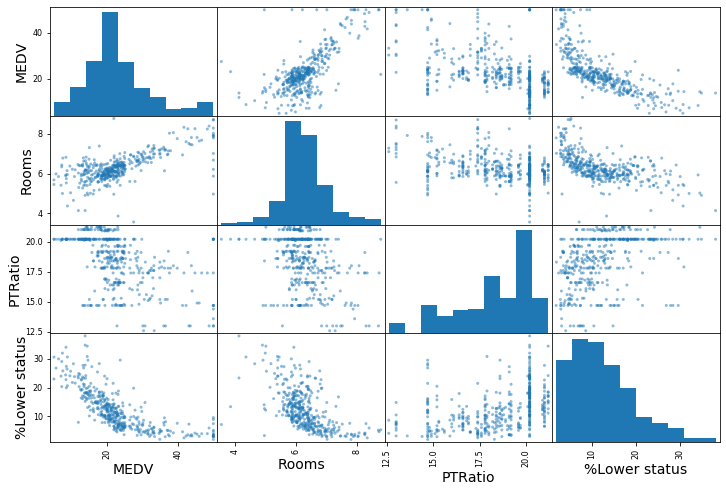

In [17]:
from pandas.plotting import scatter_matrix

attributes = ["MEDV", "Rooms", "PTRatio",
              "%Lower status"]
scatter_matrix(housing[attributes], figsize=(12, 8))

#Step 4. Prepare the data for Machine Learning algorithms (aka Data Cleaning)

In [0]:
housing = train_set.drop("MEDV", axis=1) # drop labels for training set
housing_labels = train_set["MEDV"].copy()

In [19]:
# Check to see if there's any missing value in the data with .isnull()
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,Crime rate,Land zone,Business Acre,Charles River,Nitric oxides,Rooms,Age,Distance,radial highways,Tax,PTRatio,Blacks,%Lower status


In [0]:
# Scikit-Learn has a handy class to take care of this: the SimpleImputer class.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [21]:
imputer.fit(housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [22]:
imputer.statistics_

array([2.6363e-01, 0.0000e+00, 8.5600e+00, 0.0000e+00, 5.3200e-01,
       6.2230e+00, 7.6700e+01, 3.3633e+00, 5.0000e+00, 3.2900e+02,
       1.8800e+01, 3.9113e+02, 1.0740e+01])

Transfer the training set.

In [23]:
X = imputer.transform(housing)
print(X)

[[1.4932e-01 2.5000e+01 5.1300e+00 ... 1.9700e+01 3.9511e+02 1.3150e+01]
 [8.8125e-01 0.0000e+00 2.1890e+01 ... 2.1200e+01 3.9690e+02 1.8340e+01]
 [6.6170e-02 0.0000e+00 3.2400e+00 ... 1.6900e+01 3.8244e+02 9.9700e+00]
 ...
 [1.0793e-01 0.0000e+00 8.5600e+00 ... 2.0900e+01 3.9349e+02 1.3000e+01]
 [4.5440e-02 0.0000e+00 3.2400e+00 ... 1.6900e+01 3.6857e+02 9.0900e+00]
 [1.9657e-01 2.2000e+01 5.8600e+00 ... 1.9100e+01 3.7614e+02 1.0150e+01]]


In [0]:
housing_tr = pd.DataFrame(X, columns=housing.columns,
                          index=housing.index)
housing_tr.loc[sample_incomplete_rows.index.values]
housing_tr = pd.DataFrame(X, columns=housing.columns,
                          index=housing.index)

To standardize the scales of inputs

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing)

In [0]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [27]:
print(housing.shape)
print(housing_prepared.shape)

(405, 13)
(405, 13)


In [28]:
housing_prepared

array([[-0.40336926,  0.58857438, -0.84864394, ...,  0.60686296,
         0.41913681,  0.12403316],
       [-0.30764578, -0.48828063,  1.61076403, ...,  1.305762  ,
         0.44011716,  0.86990347],
       [-0.41424381, -0.48828063, -1.12598768, ..., -0.69774859,
         0.27063351, -0.33297408],
       ...,
       [-0.40878234, -0.48828063, -0.34531642, ...,  1.16598219,
         0.40014902,  0.10247622],
       [-0.41695493, -0.48828063, -1.12598768, ..., -0.69774859,
         0.10806518, -0.45944149],
       [-0.3971898 ,  0.45935178, -0.74152176, ...,  0.32730334,
         0.19679209, -0.30710574]])

# Step 5. Select and train a model

Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
# Note here that you only use transform() instead of fit_tranform becausue you are not trying to learn any parameter (ie. median)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [17.66216364 13.92078024 20.70354055 24.28936697 30.41878718]


In [31]:
print("Labels:", list(some_labels))

Labels: [18.7, 14.3, 19.3, 23.1, 34.7]


In [32]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.741308114189465

In [33]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

3.3461624553614118

Decision Tree Regressor

In [34]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

Highly ikely to be overfitted, so we apply the RMSE 5-fold Cross Validation


In [0]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)

In [36]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [4.03201693 3.63333333 5.1712047  5.15003296 4.31722076]
Mean: 4.460761735110812
Standard deviation: 0.6113735209161012


Same score for linear regression model

In [37]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [5.71250876 5.15818026 4.92285957 4.6333671  4.57952378]
Mean: 5.001287894467557
Standard deviation: 0.4122746675263314


Random Forest Regressor

In [38]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [39]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

1.3260721355348566

This is likely to be overfitted, so we apply the RMSE 5-fold Cross Validation.

In [40]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [3.13797347 3.2570173  3.58966761 4.1515336  3.06685705]
Mean: 3.440609806052916
Standard deviation: 0.3981499618512443


In [41]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean      4.878920
std       1.010755
min       3.027770
25%       4.231098
50%       4.847177
75%       5.642854
max       6.457100
dtype: float64

# Step 6. Fine tune your model

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [43]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [44]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Score of each hyperparameter combination tested during the grid search:

In [45]:
cvres = grid_search.cv_results_
# zip() is to combine the column "mean_test_score" with struct "params"
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

4.839539934374551 {'max_features': 2, 'n_estimators': 3}
4.113143851809588 {'max_features': 2, 'n_estimators': 10}
3.9891535762795645 {'max_features': 2, 'n_estimators': 30}
4.707330768382754 {'max_features': 4, 'n_estimators': 3}
3.9244473700756677 {'max_features': 4, 'n_estimators': 10}
3.6216588821954105 {'max_features': 4, 'n_estimators': 30}
4.708166153847582 {'max_features': 6, 'n_estimators': 3}
3.667781884275193 {'max_features': 6, 'n_estimators': 10}
3.5272710630547484 {'max_features': 6, 'n_estimators': 30}
3.8988623433017557 {'max_features': 8, 'n_estimators': 3}
3.604890128631686 {'max_features': 8, 'n_estimators': 10}
3.445956450296321 {'max_features': 8, 'n_estimators': 30}
4.321712813930437 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
4.000557924053056 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
4.26077943885996 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
3.448626063868778 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [46]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006922,0.002435,0.001173,0.000549,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-24.986927,-26.678546,-25.947929,-23.377723,-16.114609,-23.421147,3.816656,18,-4.073392e+00,-5.227030e+00,-5.277329e+00,-5.125720e+00,-7.802363e+00,-5.501167e+00,1.232904e+00
1,0.017744,0.001721,0.001527,0.000088,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-20.049126,-20.922583,-13.422328,-12.863856,-17.331869,-16.917952,3.306591,13,-2.785649e+00,-2.968565e+00,-2.996122e+00,-2.592860e+00,-3.650620e+00,-2.998763e+00,3.566544e-01
2,0.047174,0.000426,0.002825,0.000108,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-21.202048,-18.143844,-11.762333,-12.459963,-15.998543,-15.913346,3.524472,10,-2.431944e+00,-2.307530e+00,-2.312766e+00,-2.500257e+00,-2.527773e+00,-2.416054e+00,9.194514e-02
3,0.006551,0.000268,0.000967,0.000050,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-24.912579,-27.157490,-15.842606,-18.428848,-24.453292,-22.158963,4.281162,16,-5.041759e+00,-8.105525e+00,-7.580809e+00,-7.892226e+00,-9.995988e+00,-7.723261e+00,1.584342e+00
4,0.018769,0.000541,0.001555,0.000151,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-19.684362,-18.626141,-11.760327,-11.215573,-15.720033,-15.401287,3.453196,9,-2.759724e+00,-3.171846e+00,-3.371041e+00,-3.183552e+00,-3.754358e+00,-3.248104e+00,3.224604e-01
5,0.054341,0.001153,0.003048,0.000208,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-16.166387,-16.108317,-9.018847,-9.936843,-14.351672,-13.116413,3.055468,6,-2.273831e+00,-2.080935e+00,-2.038921e+00,-2.098218e+00,-2.157309e+00,-2.129843e+00,8.141985e-02
6,0.007212,0.000399,0.000992,0.000080,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-24.891509,-16.961770,-20.811578,-15.577133,-32.592154,-22.166829,6.139458,17,-4.337905e+00,-6.394335e+00,-7.008999e+00,-7.309784e+00,-6.963200e+00,-6.402844e+00,1.074059e+00
7,0.020855,0.000294,0.001469,0.000040,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-13.681462,-12.399638,-13.972156,-12.692479,-14.517385,-13.452624,0.792792,7,-2.880333e+00,-2.720550e+00,-3.154889e+00,-3.281682e+00,-3.289679e+00,-3.065427e+00,2.272700e-01
8,0.064718,0.002136,0.003417,0.000472,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-16.057188,-11.278370,-11.237301,-12.697471,-10.937876,-12.441641,1.908013,3,-2.395226e+00,-1.656617e+00,-1.817001e+00,-2.113842e+00,-2.160514e+00,-2.028640e+00,2.616209e-01
9,0.007954,0.000255,0.000966,0.000031,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-23.500398,-12.255473,-17.668272,-12.098368,-10.483128,-15.201128,4.806833,8,-4.140713e+00,-3.856656e+00,-3.971814e+00,-5.239709e+00,-5.093275e+00,-4.460433e+00,5.853673e-01


In [47]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [48]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

3.4057668668791408 {'max_features': 7, 'n_estimators': 180}
3.699284786099795 {'max_features': 5, 'n_estimators': 15}
3.7364280931156193 {'max_features': 3, 'n_estimators': 72}
3.514830808062523 {'max_features': 5, 'n_estimators': 21}
3.397580277691538 {'max_features': 7, 'n_estimators': 122}
3.739799034234447 {'max_features': 3, 'n_estimators': 75}
3.733636764665271 {'max_features': 3, 'n_estimators': 88}
3.434391889313552 {'max_features': 5, 'n_estimators': 100}
3.6954948226303572 {'max_features': 3, 'n_estimators': 150}
4.597604045909452 {'max_features': 5, 'n_estimators': 2}


In [49]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.03484054, 0.00263572, 0.05203612, 0.00150965, 0.04035453,
       0.32368001, 0.0328016 , 0.05403512, 0.00585764, 0.01671647,
       0.02428519, 0.0176127 , 0.39363471])

In [0]:
final_model = grid_search.best_estimator_

X_test = test_set.drop("MEDV", axis=1)
y_test = test_set["MEDV"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [51]:
final_rmse

2.727477063719018

In [52]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([2.11589857, 3.22509465])

# Step 7. Present your solution

For the dataset of housing prices in Boston, MA, we use three different models, Linear Regression, Decision Tree Regressor, and Random Forest Regressor. Among these three models, we found that Random Forest Regressor performed the best according to its lowest root mean square error. The final model has a RMSE with 5-fold Cross Validation of 2.73, and the 95% confidence interval for this score is [2.116, 3.225].



#Step 8. Launch, maintain, and update
